# Import thư viên

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = pd.read_csv('data.csv')

In [2]:
data

,A,B1,B2,A_doithu,B_doithu
0,0,0,0,180315,5403820
1,0,0,0,293248,11458146
2,0,0,0,177016,18438880
3,0,0,0,327871,10013404
4,735,450,560,181098,4864172
5,330,350,600,270405,10889213
6,560,360,630,90514,4774831
7,750,420,805,355380,9768208
8,730,450,850,202572,6012674
9,450,400,750,244208,9402112


# Mô hình VAR

In [17]:
from typing import Any
import matplotlib.pyplot as plt

class ModelVAR:
    def __init__(self, maxlags=5, trend='c'):
        self.maxlags = maxlags
        self.trend = trend
        self.model = None

    def build_train_test_data(self, data, numbers_train, features):
        df = data[features]
        train, test = df[4:numbers_train + 4], df[numbers_train + 4:15]
        return train, test
    

    def model_VAR(self, train):
        self.model = VAR(train)
        self.model = self.model.fit(maxlags=self.maxlags, trend=self.trend)
        return self.model

    def predict(self, steps=1):
        return self.model.forecast(self.model.endog, steps=steps)
    
    def plot_evaluate(self, train, test, prediction):
        train_range = list(range(4, len(train) + 4))
        prediction_range  = list(range(len(train) + 4, len(train) + len(prediction) + 4))
        markers = ['o', 'v', '^', 's', 'p']

        figre, axs = plt.subplots(1, len(train.columns), figsize = (28, 7))
        for i, feature in enumerate(test.columns):
            axs[i].plot(train_range, train[feature], label=f'Train-{feature}', marker=markers[i])
            if len(test) > 0:
                axs[i].plot(prediction_range, test[feature], label=f'Test-{feature}', marker=markers[i])
                axs[i].plot(prediction_range, prediction[:, i], label=f'Predict-{feature}', marker=markers[i])
            else:
                axs[i].plot(prediction_range, prediction[:, i], label=f'Predict-{feature}', marker=markers[i])
            axs[i].set_xlabel('time')
            axs[i].set_ylabel(feature)
            axs[i].set_title(f'Biểu đồ biểu diễn {feature}')
            axs[i].legend()
            axs[i].grid(True)
            # axs[i].show()
        return figre

    def evaluate(self, test, print_error=True):
        prediction = self.predict(steps=len(test))
        
        maes = {}
        if len(test) > 0:
            for i, feature in enumerate(test.columns):
                mae = mean_absolute_error(test[feature], prediction[:, i])
                maes[feature] = mae
            
            if print_error==True:
                for i, feature in enumerate(test.columns):
                    print(f'MAE {feature}: {maes[feature]}')
        return maes, prediction
    
    def fit(self, data, numbers_train=7, features=['A', 'B1', 'B2', 'A_doithu', 'B_doithu']):
        train, test = self.build_train_test_data(data, numbers_train, features)
        self.model = self.model_VAR(train)
        return train, test

        

# Chạy mô hình

*Note*: Chỉnh sửa các tham số như sau:
+ maxlags: bậc của mô hình VAR
+ trend: có thể chỉnh sửa ['c', 'ct', 'ctt', 'n']
+ features: các trường sử dụng
+ numbers_train: số lượng data để train, lượng còn lại dùng làm test

MAE A: 163.21213356453842
MAE B1: 97.50531021040558
MAE B2: 327.78579054312604
MAE A_doithu: 41173.7393661512
MAE B_doithu: 6811127.587092393


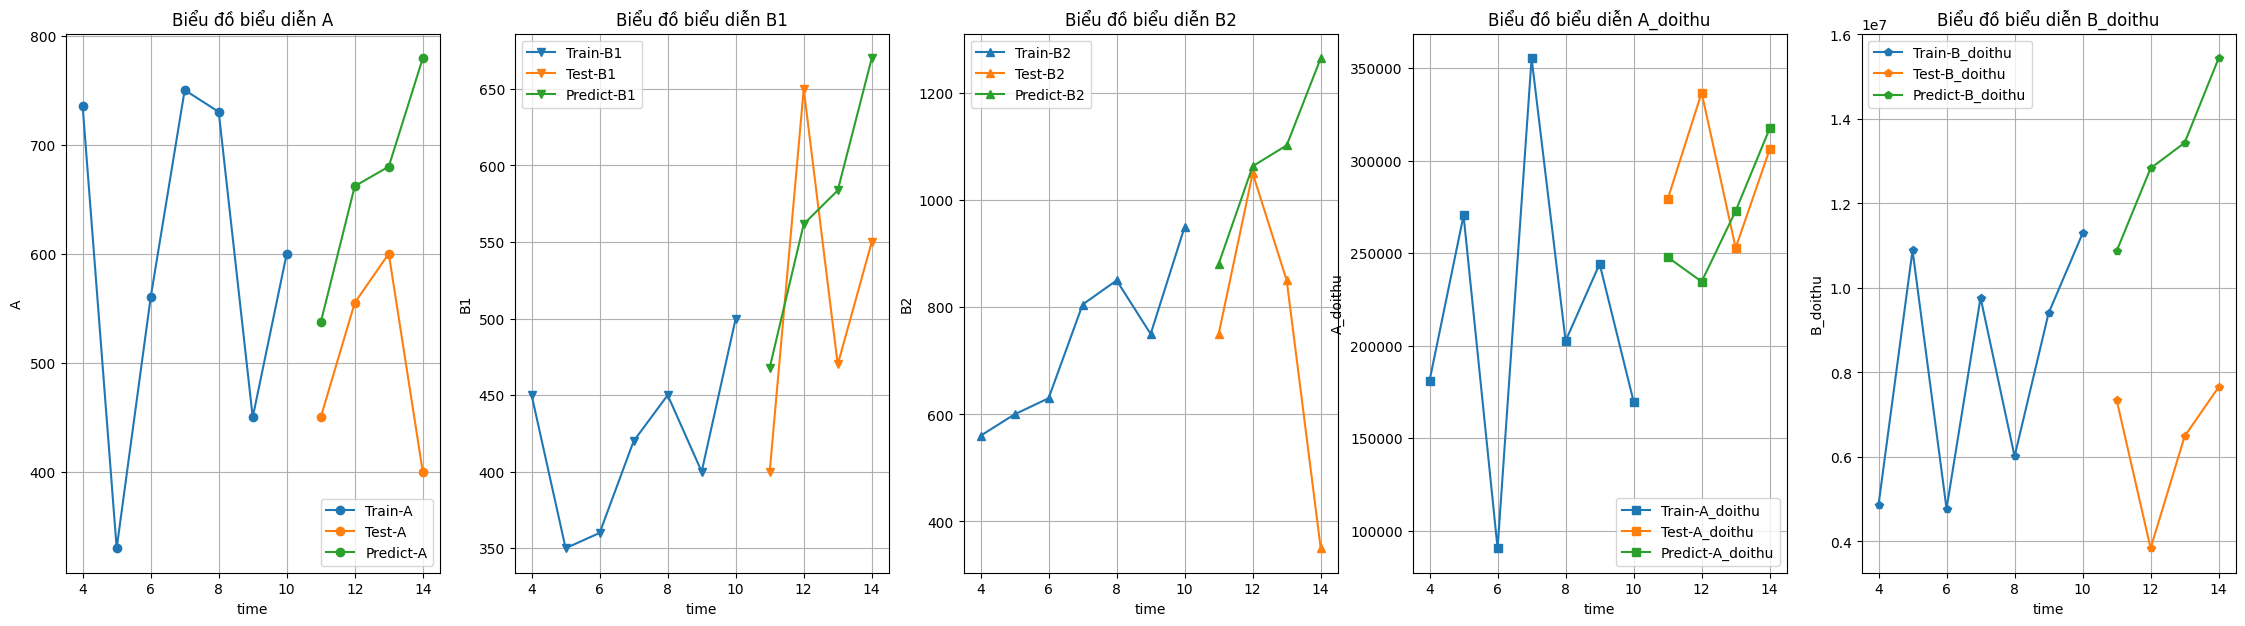

In [21]:
model_5_features = ModelVAR(maxlags=5, trend='c')
train, test = model_5_features.fit(data, numbers_train=7, features=['A', 'B1', 'B2', 'A_doithu', 'B_doithu'])
maes, prediction = model_5_features.evaluate(test=test, print_error=True)
figre = model_5_features.plot_evaluate(train, test, prediction=prediction)

array([[3.80155158e+02, 4.58800061e+02, 5.30927402e+02, 2.78289383e+05,
        6.41024391e+06],
       [4.77249726e+02, 4.80840923e+02, 8.35487788e+02, 2.72521765e+05,
        4.88068439e+06],
       [4.38669321e+02, 4.81040144e+02, 6.72220816e+02, 2.59961421e+05,
        4.88024412e+06],
       [3.45853857e+02, 4.31745860e+02, 4.43405475e+02, 2.33389177e+05,
        4.81744748e+06],
       [3.35253267e+02, 3.52348236e+02, 4.51910170e+02, 2.03718448e+05,
        4.89758474e+06]])

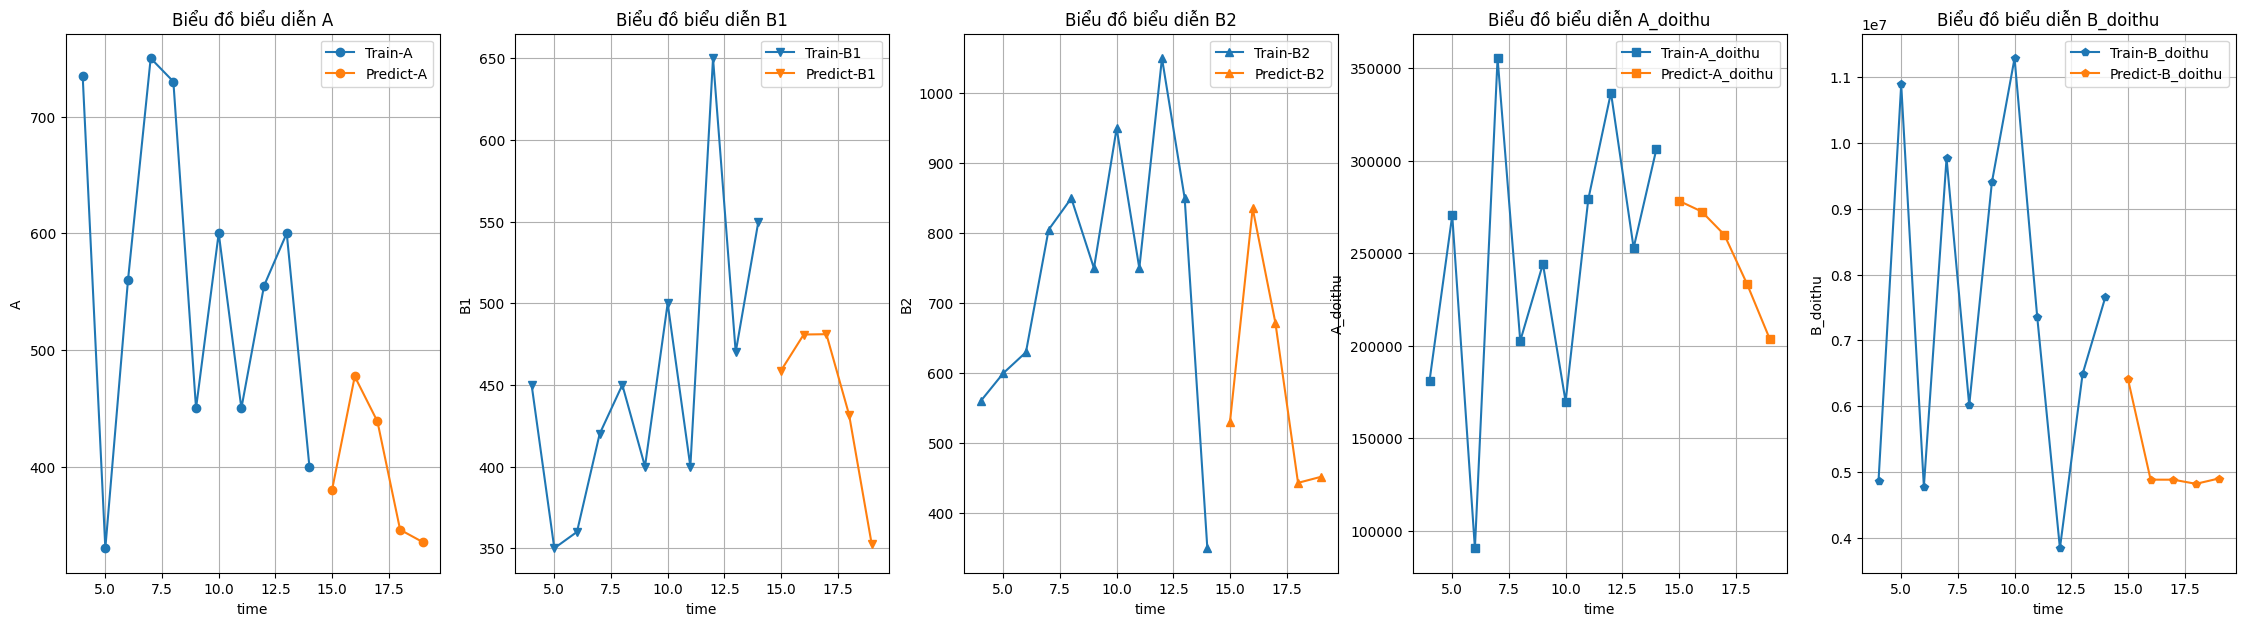

In [39]:
model_5_features = ModelVAR(maxlags=7, trend='c')
train, test = model_5_features.fit(data, numbers_train=11, features=['A', 'B1', 'B2', 'A_doithu', 'B_doithu'])
predict_next = model_5_features.predict(steps=5)
figre = model_5_features.plot_evaluate(train, test, prediction=predict_next)
predict_next

MAE A: 63.60794995421155
MAE A_doithu: 99694.26287180299


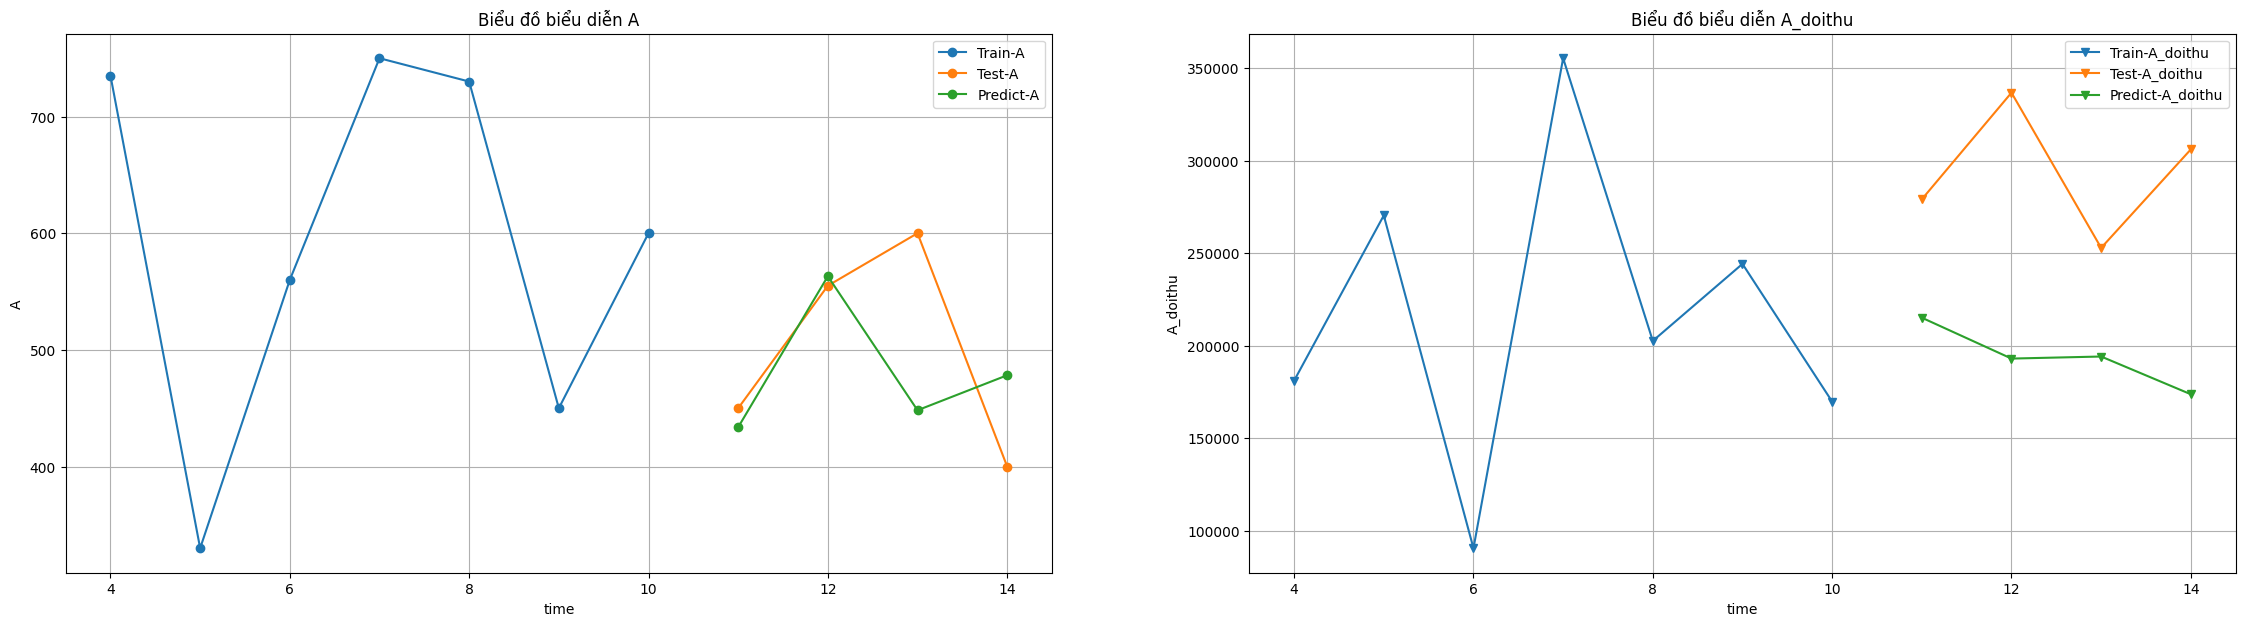

In [6]:
model_2_features = ModelVAR(maxlags=5, trend='c')
train, test = model_2_features.fit(data, numbers_train=7, features=['A', 'A_doithu'])
maes, prediction = model_2_features.evaluate(test=test, print_error=True)
figre = model_2_features.plot_evaluate(train, test, prediction=prediction)

array([[   636.67349634, 276591.71009084],
       [   501.36929488, 430125.90977213],
       [   704.47720838, 384310.26522434],
       [   611.61284722, 386588.92432451],
       [   638.57265683, 429640.79678506]])

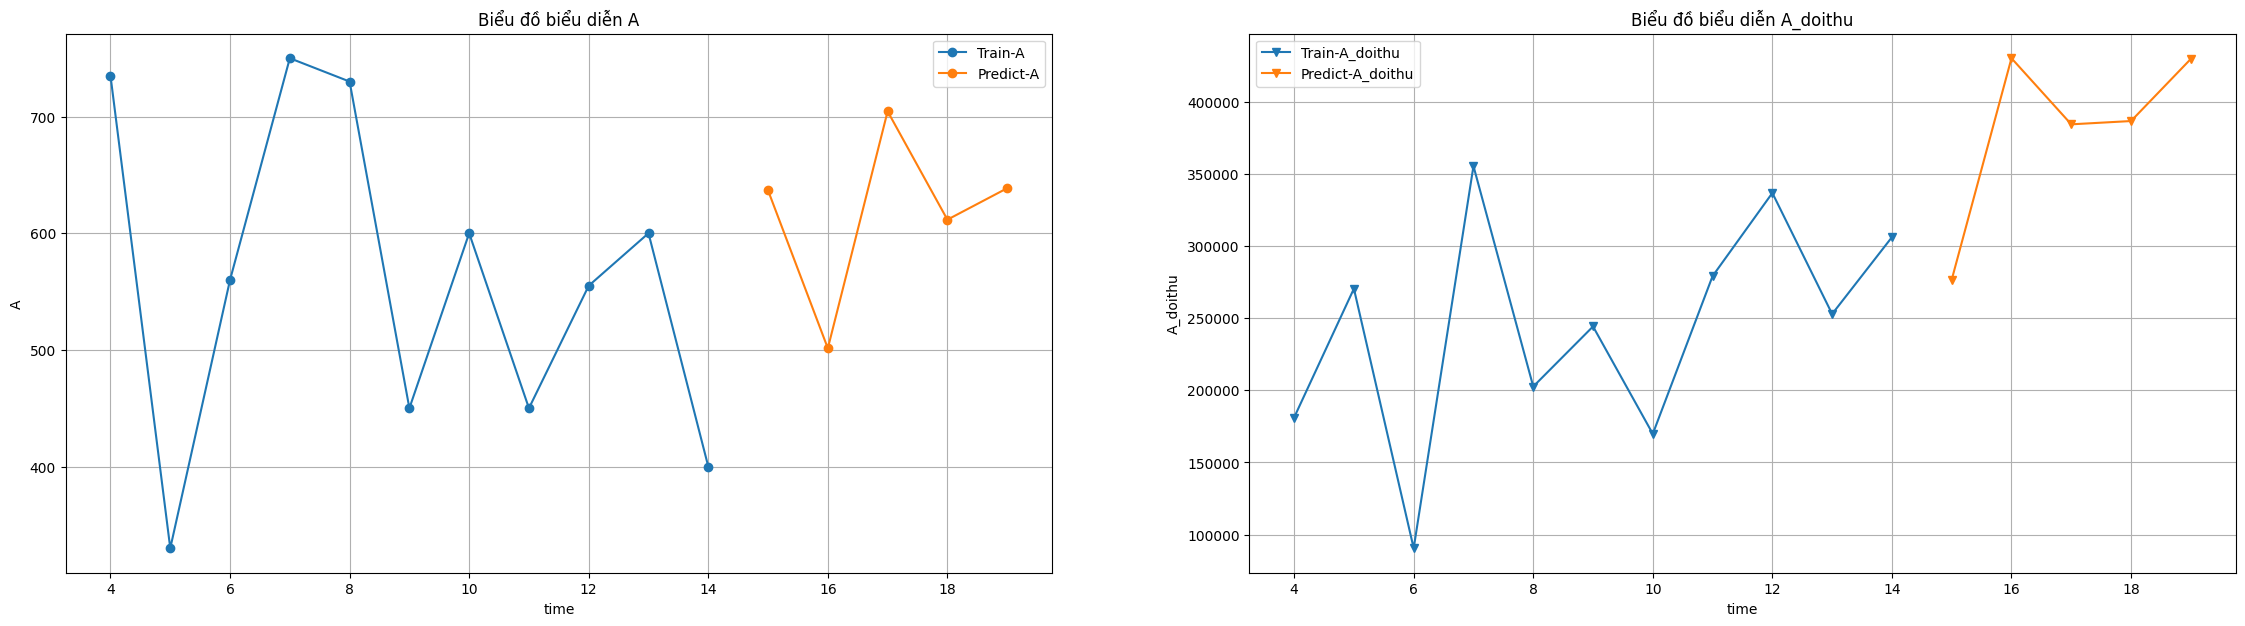

In [40]:
model_2_features = ModelVAR(maxlags=5, trend='c')
train, test = model_2_features.fit(data, numbers_train=11, features=['A', 'A_doithu'])
predict_next = model_2_features.predict(steps=5)
figre = model_2_features.plot_evaluate(train, test, prediction=predict_next)
predict_next

MAE B1: 97.61560221052642
MAE B2: 328.0729790665026
MAE B_doithu: 6814639.756697122


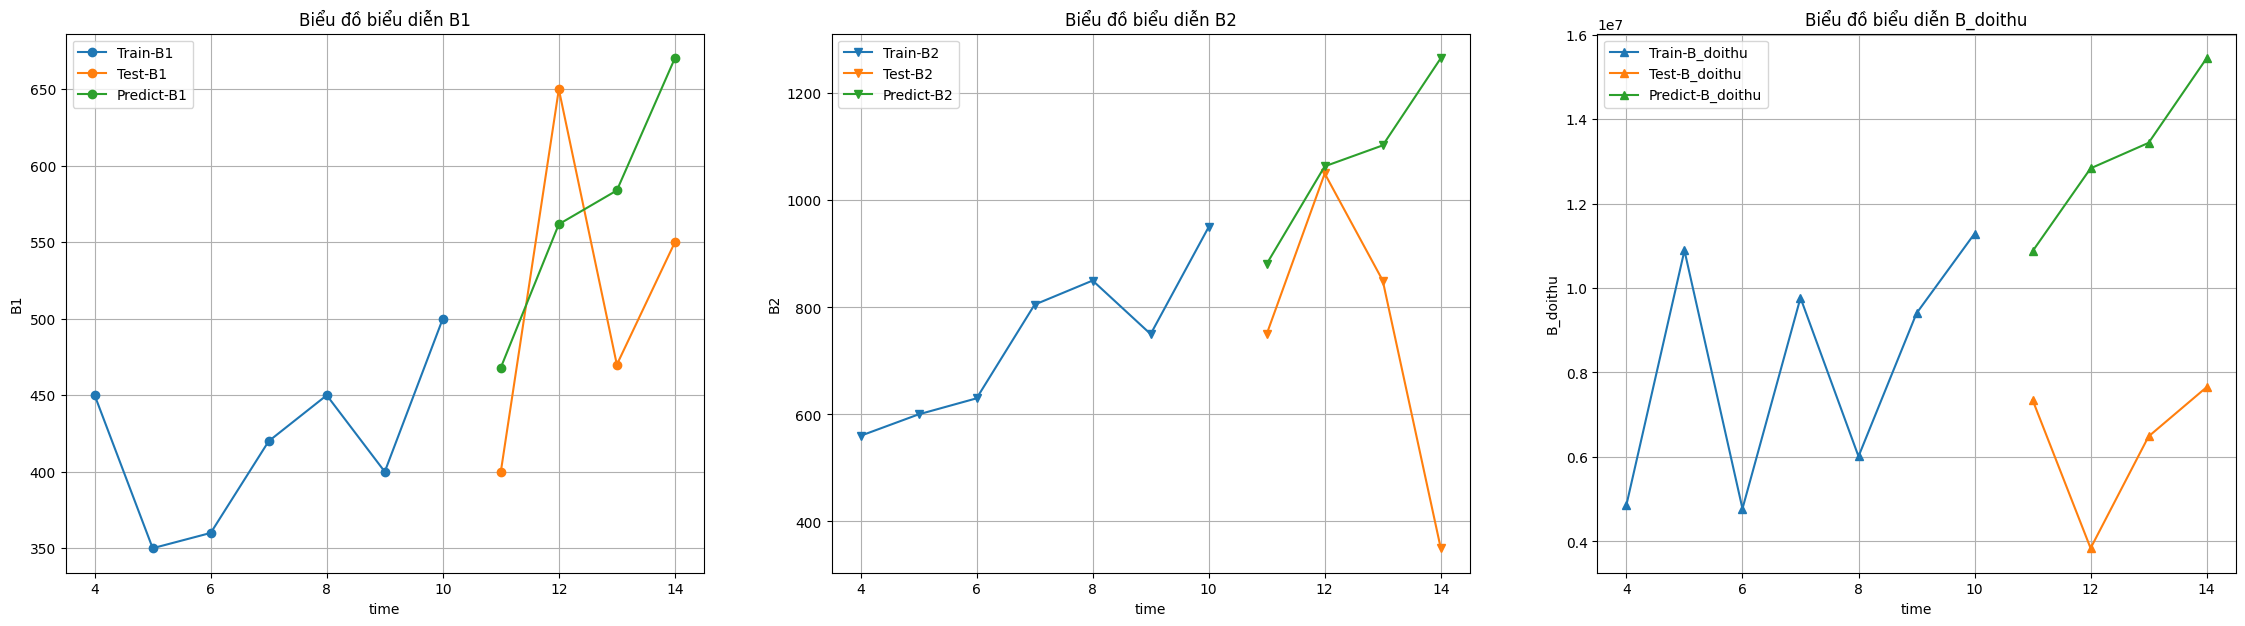

In [7]:
model_3_features = ModelVAR(maxlags=5, trend='ctt')
train, test = model_3_features.fit(data, numbers_train=7, features=['B1', 'B2', 'B_doithu'])
maes, prediction = model_3_features.evaluate(test=test, print_error=True)
figre = model_3_features.plot_evaluate(train, test, prediction=prediction)

array([[4.58740399e+02, 5.30727645e+02, 6.40883739e+06],
       [4.80700743e+02, 8.35505407e+02, 4.87803948e+06],
       [4.80906047e+02, 6.71970743e+02, 4.87775656e+06],
       [4.31583184e+02, 4.43055134e+02, 4.81318567e+06],
       [3.52013450e+02, 4.51676290e+02, 4.89341666e+06]])

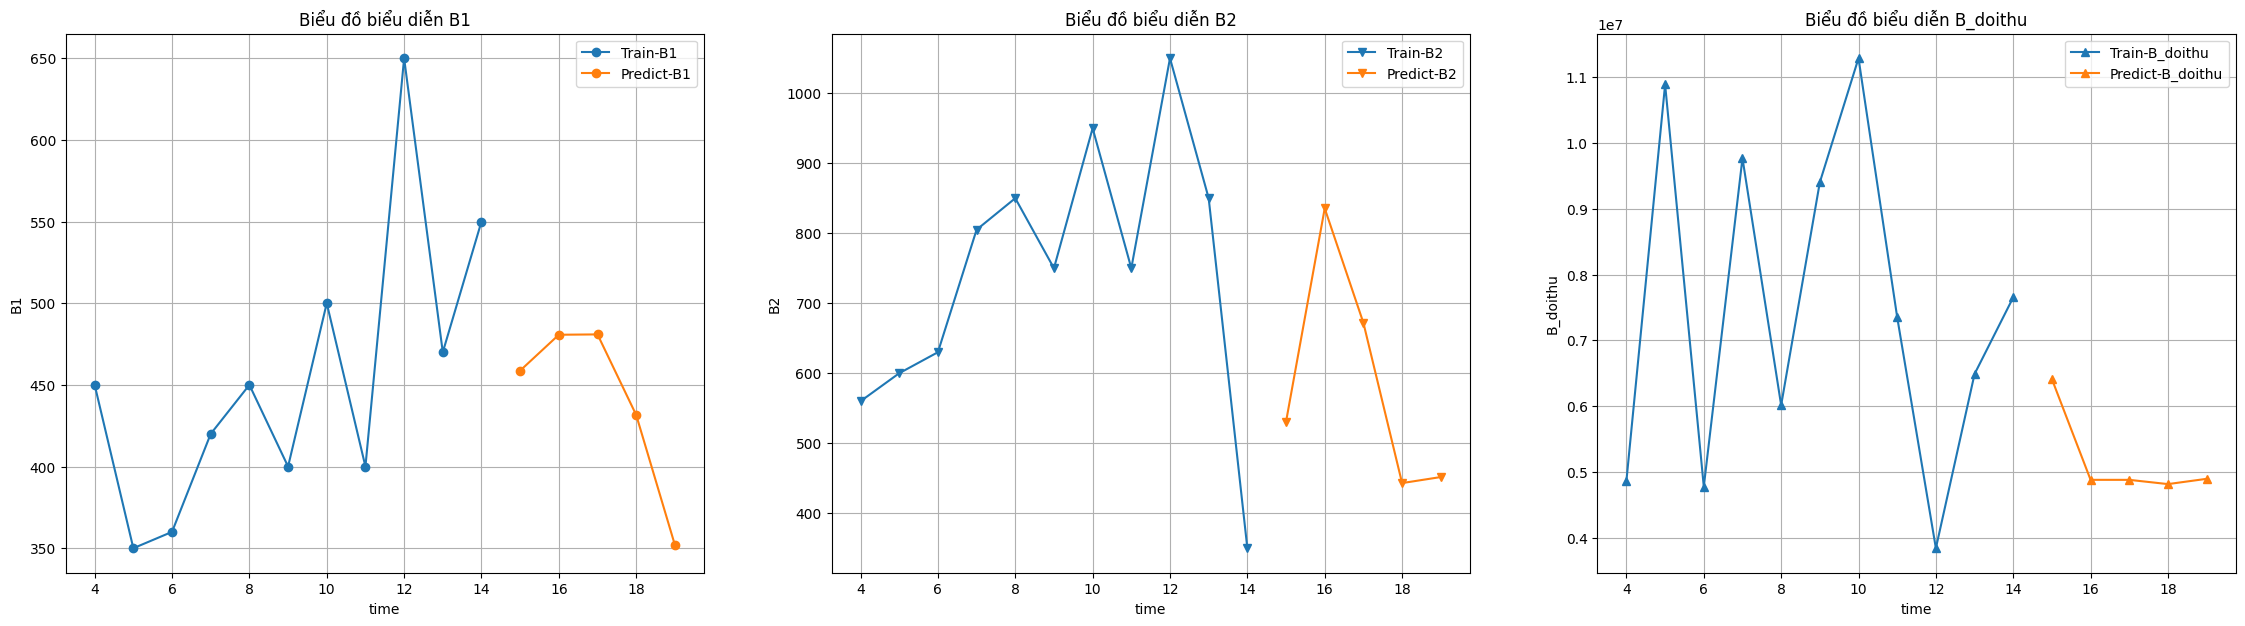

In [41]:
model_2_features = ModelVAR(maxlags=7, trend='c')
train, test = model_2_features.fit(data, numbers_train=11, features=['B1', 'B2', 'B_doithu'])
predict_next = model_2_features.predict(steps=5)
figre = model_2_features.plot_evaluate(train, test, prediction=predict_next)
predict_next